## GPGN-314 Applied Geophysics:  Gravity Module -- Forward modeling the gravity response for 2D subsurface structures

This notebook demonstrates how to forward model gravity data for a 2D earth.
When we say it is 2D, we usually mean that what our model extends infinitely into and out of the page.
There is a closed form analytical solution for an arbitrary polygon that is provided in the `gpoly.py` file.

You should hopefully get experience
* Representing bodies as polygons.
* Simulating multiple bodies (and using the superposition principle)
* Modeling your own experiment (The Tunnel!)


In [1]:
import numpy as np
from gpoly import gpoly, plot_model

In [29]:
# build a model of a dike,
# These are the locations of the corners of the polygon, listed clockwise.

dike_v = np.array([
    [-150.0, 100.0],
    [150.0, 100.0],
    [150.0, 800.0],
    [-150.0, 800.0]
])

# create our observation locations
# note we could read these locations in from a file
# if we had measured locations. Here we're just going to create
# a line of points from -2500 m to 2500 m with 50 m spacing.
xmin, xmax = -2500, 2500
dx = 50

obs_x = np.linspace(xmin, xmax, (xmax-xmin)//dx + 1)
obs_z = np.zeros_like(obs_x)
obs_dike = np.c_[obs_x, obs_z]
# obs dike is a 2D numpy array with a shape of (n_obs, 2) (the 2 is for x and z dimensions)
print(obs_dike)

[[-2500.     0.]
 [-2450.     0.]
 [-2400.     0.]
 [-2350.     0.]
 [-2300.     0.]
 [-2250.     0.]
 [-2200.     0.]
 [-2150.     0.]
 [-2100.     0.]
 [-2050.     0.]
 [-2000.     0.]
 [-1950.     0.]
 [-1900.     0.]
 [-1850.     0.]
 [-1800.     0.]
 [-1750.     0.]
 [-1700.     0.]
 [-1650.     0.]
 [-1600.     0.]
 [-1550.     0.]
 [-1500.     0.]
 [-1450.     0.]
 [-1400.     0.]
 [-1350.     0.]
 [-1300.     0.]
 [-1250.     0.]
 [-1200.     0.]
 [-1150.     0.]
 [-1100.     0.]
 [-1050.     0.]
 [-1000.     0.]
 [ -950.     0.]
 [ -900.     0.]
 [ -850.     0.]
 [ -800.     0.]
 [ -750.     0.]
 [ -700.     0.]
 [ -650.     0.]
 [ -600.     0.]
 [ -550.     0.]
 [ -500.     0.]
 [ -450.     0.]
 [ -400.     0.]
 [ -350.     0.]
 [ -300.     0.]
 [ -250.     0.]
 [ -200.     0.]
 [ -150.     0.]
 [ -100.     0.]
 [  -50.     0.]
 [    0.     0.]
 [   50.     0.]
 [  100.     0.]
 [  150.     0.]
 [  200.     0.]
 [  250.     0.]
 [  300.     0.]
 [  350.     0.]
 [  400.     0

In [22]:
g_dike_v = gpoly(obs_dike, dike_v, density=1.0)

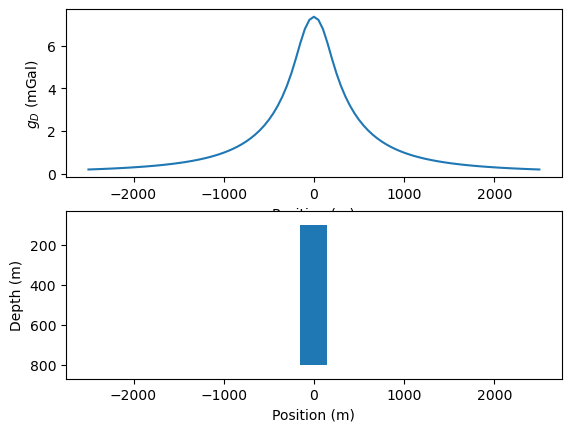

In [23]:
ax1, ax2 = plot_model(g_dike_v, obs_dike, dike_v)

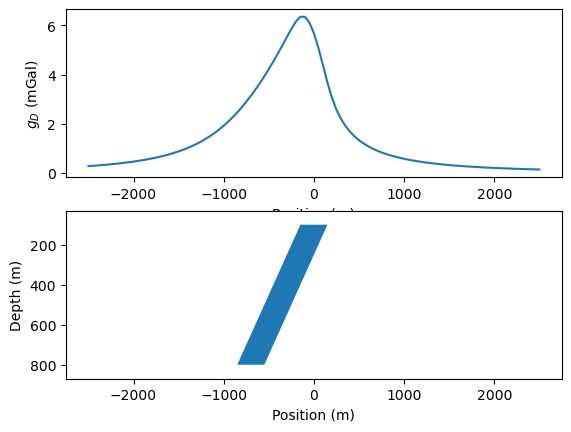

In [24]:
# This dike dips towards the left
dike_l = np.array([
    [-150.0, 100.0],
    [150.0, 100.0],
    [-550.0, 800.0],
    [-850.0, 800.0]
])

g_dike_l = gpoly(obs_dike, dike_l, density=1.0)
ax1, ax2 = plot_model(g_dike_l, obs_dike, dike_l)

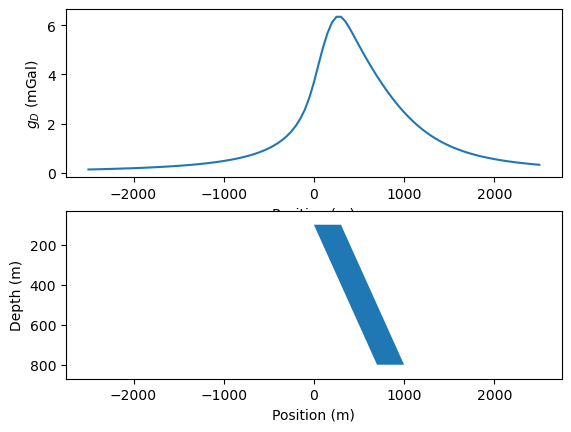

In [25]:
# This dike dips towards the right
dike_r = np.array([
    [0.0, 100.0],
    [300.0, 100.0],
    [1000.0, 800.0],
    [700.0, 800.0]
])

g_dike_r = gpoly(obs_dike, dike_r, density=1.0)
ax1, ax2 = plot_model(g_dike_r, obs_dike, dike_r)

# Superposition

As we discussed in class gravity follows a super-position principle.
For example, here are two dikes, both dipping in the same direction

To get the gravitational response, we can simply sum them together!

**_NOTE:_** You can pass multiple dikes to the `plot_model` function!


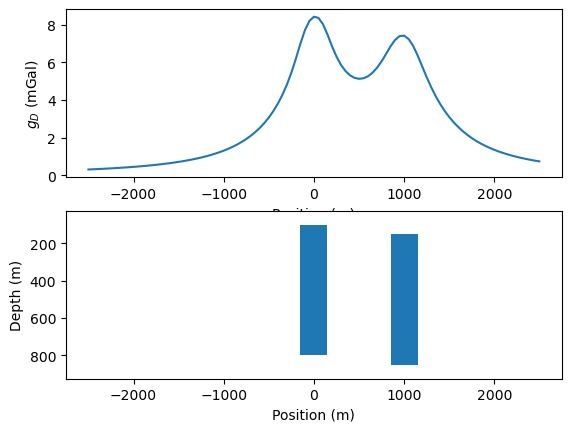

In [32]:
# Make a second dike that is a copy of the first dike, but shifted
# 1000 m to the right and 50 m down
dike_v2 = dike_v + [1000, 50]

# forward model the response
g_dike_v2 = gpoly(obs_dike, dike_v2, density=1.0)

# add them together!
g_two_dike = g_dike_v + g_dike_v2

# can plot multiple polys at the same time with this helper function!
ax1, ax2 = plot_model(g_two_dike, obs_dike, dike_v, dike_v2)

# Your turn
Come up with your own model, using the dikes as an example. Put as many bodies in as
you like, and come up with your own sampling over them.

For each body, make sure you enter the points in clockwise.
You can use more than four points as well!

# Tunnel

Finally use your measurements you took for the tunnel to forward model the response we expect to measure.
You'll have to make sure you enter